### Matched Catalog Analysis
This notebook generates a complete catalog of the original catalogs merged horizontally according to lyr matches


In [3]:
import sys
sys.path.append("./util_classes")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

from data_loader import DataLoader

### Configurations

In [4]:
data_file_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_lyr/output/LR_Final_XJ.txt"
input_catalog_file_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_raw/DAWN_EDFF_DR1.fits"
output_catalog_file_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_raw/LuoCDFS.fits"
data_output_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_final"
input_catalog_id_col = "ID"
output_catalog_id_col = "Seq"

catalog_name = "h20_cdfs"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
matched_catalog = np.genfromtxt(data_file_path)

matched_catalog_df = pd.DataFrame(
    matched_catalog,
    columns=[
        "OutID",
        "RAout",
        "DECout",
        "mag_out",
        "InID",
        "RAin",
        "DECin",
        "mag_in",
        "r",
        "f(r)",
        "df",
        "f(df)",
        "q(m)",
        "n(m)",
        "LR",
        "Rel",
        "flag"
    ]
)

matched_catalog_df.head(10)

,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,1.0,52.899178,-27.859588,0.0,458823.0,52.899085,-27.859724,22.4476,0.593,0.130900,0.0,1.0,0.13980,0.000868,21.09000,0.988,1.0
1,2.0,52.911023,-27.892965,0.0,456376.0,52.911016,-27.893012,23.5542,0.169,2.154000,0.0,1.0,0.17060,0.001832,200.60000,0.999,1.0
2,3.0,52.917119,-27.796253,0.0,432522.0,52.917198,-27.796321,22.3965,0.373,0.825700,0.0,1.0,0.13790,0.000835,136.40000,0.998,1.0
3,4.0,52.919726,-27.773984,0.0,434176.0,52.919639,-27.773924,26.1209,0.381,0.784700,0.0,1.0,0.12980,0.003831,26.58000,0.990,1.0
4,5.0,52.920710,-27.743110,0.0,436873.0,52.920718,-27.743131,25.0435,0.082,2.607000,0.0,1.0,0.16290,0.003399,125.00000,0.998,1.0
5,6.0,52.930145,-27.901341,0.0,455747.0,52.930106,-27.901543,25.5950,0.741,0.023480,0.0,1.0,0.14790,0.003749,0.92580,0.777,1.0
6,10.0,52.937251,-27.860624,0.0,458710.0,52.937148,-27.860634,27.1852,0.373,0.825500,0.0,1.0,0.08788,0.003189,22.75000,0.988,1.0
7,11.0,52.937355,-27.761025,0.0,435359.0,52.937483,-27.761210,23.4918,0.810,0.009327,0.0,1.0,0.16970,0.001766,0.89590,0.771,1.0
8,12.0,52.938022,-27.830329,0.0,449187.0,52.938188,-27.830538,23.9885,0.961,0.000909,0.0,1.0,0.17440,0.002305,0.06873,0.205,1.0
9,13.0,52.938318,-27.909828,0.0,455155.0,52.938379,-27.909941,21.3194,0.462,0.432100,0.0,1.0,0.09279,0.000338,118.50000,0.998,1.0


In [6]:
best_matches_df = matched_catalog_df[
    matched_catalog_df['flag'] == 1.0
]

best_matches_df = best_matches_df.sort_values(by='OutID')
best_matches_df = best_matches_df.reset_index(drop=True)

best_matches_df.head(10)

,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,1.0,52.899178,-27.859588,0.0,458823.0,52.899085,-27.859724,22.4476,0.593,0.130900,0.0,1.0,0.13980,0.000868,21.0900,0.988,1.0
1,2.0,52.911023,-27.892965,0.0,456376.0,52.911016,-27.893012,23.5542,0.169,2.154000,0.0,1.0,0.17060,0.001832,200.6000,0.999,1.0
2,3.0,52.950038,-27.771467,0.0,434363.0,52.950083,-27.771548,26.6291,0.334,1.050000,0.0,1.0,0.11020,0.003649,31.7200,0.992,1.0
3,3.0,52.917119,-27.796253,0.0,432522.0,52.917198,-27.796321,22.3965,0.373,0.825700,0.0,1.0,0.13790,0.000835,136.4000,0.998,1.0
4,4.0,52.919726,-27.773984,0.0,434176.0,52.919639,-27.773924,26.1209,0.381,0.784700,0.0,1.0,0.12980,0.003831,26.5800,0.990,1.0
5,5.0,52.920710,-27.743110,0.0,436873.0,52.920718,-27.743131,25.0435,0.082,2.607000,0.0,1.0,0.16290,0.003399,125.0000,0.998,1.0
6,5.0,53.001139,-27.795137,0.0,432738.0,53.001145,-27.795285,18.4577,0.534,0.232100,0.0,1.0,0.01709,0.000030,133.3000,0.998,1.0
7,6.0,52.930145,-27.901341,0.0,455747.0,52.930106,-27.901543,25.5950,0.741,0.023480,0.0,1.0,0.14790,0.003749,0.9258,0.777,1.0
8,7.0,53.002401,-27.832921,0.0,449019.0,53.002582,-27.833057,24.4279,0.816,0.008565,0.0,1.0,0.17290,0.002794,0.5301,0.666,1.0
9,8.0,53.020600,-27.700912,0.0,440588.0,53.020697,-27.700885,23.9769,0.363,0.882400,0.0,1.0,0.17440,0.002292,67.1200,0.996,1.0


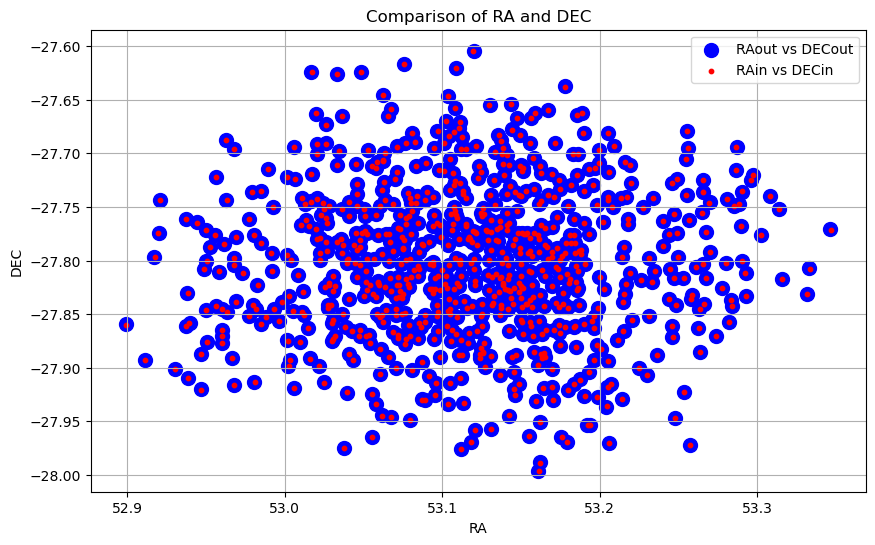

In [7]:
plt.figure(figsize=(10, 6))

plt.scatter(
    best_matches_df['RAout'], 
    best_matches_df['DECout'], 
    marker='o', 
    s=100,
    color='blue', 
    label='RAout vs DECout'
)
plt.scatter(
    best_matches_df['RAin'], 
    best_matches_df['DECin'], 
    marker='o', 
    s=10,
    color='red', 
    label='RAin vs DECin'
)

plt.title('Comparison of RA and DEC')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()
plt.grid(True)
plt.show()

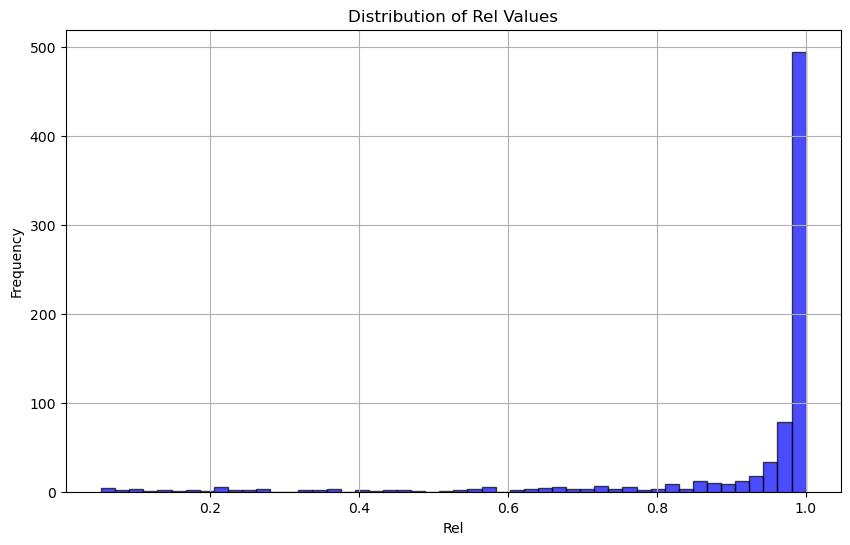

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(
    best_matches_df['Rel'], 
    bins=50, 
    color='blue', 
    edgecolor='black', 
    alpha=0.7
)

plt.title('Distribution of Rel Values')
plt.xlabel('Rel')
plt.ylabel('Frequency')
plt.grid(True)

# Display the plot
plt.show()

In [9]:
bestest_matches_df = best_matches_df[
    best_matches_df['Rel'] >= 0.8
]
bestest_matches_df.head().reset_index(drop=True)

,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,1.0,52.899178,-27.859588,0.0,458823.0,52.899085,-27.859724,22.4476,0.593,0.1309,0.0,1.0,0.1398,0.000868,21.09,0.988,1.0
1,2.0,52.911023,-27.892965,0.0,456376.0,52.911016,-27.893012,23.5542,0.169,2.1540,0.0,1.0,0.1706,0.001832,200.60,0.999,1.0
2,3.0,52.950038,-27.771467,0.0,434363.0,52.950083,-27.771548,26.6291,0.334,1.0500,0.0,1.0,0.1102,0.003649,31.72,0.992,1.0
3,3.0,52.917119,-27.796253,0.0,432522.0,52.917198,-27.796321,22.3965,0.373,0.8257,0.0,1.0,0.1379,0.000835,136.40,0.998,1.0
4,4.0,52.919726,-27.773984,0.0,434176.0,52.919639,-27.773924,26.1209,0.381,0.7847,0.0,1.0,0.1298,0.003831,26.58,0.990,1.0


### Building Combined Catalog

In [10]:
loader = DataLoader()

input_catalog = loader.get_dataframe(input_catalog_file_path)
output_catalog = loader.get_dataframe(output_catalog_file_path)

input_catalog = input_catalog.rename(columns={input_catalog_id_col: 'InID'})
output_catalog = output_catalog.rename(columns={output_catalog_id_col: 'OutID'})

print("length", len(output_catalog))
output_catalog.head()

length 1055


,OutID,RAJ2000,DEJ2000,logPB,WAV,errPos,Angle,FB,e_FB,e_fb_lc,SB,e_SB,e_sb_lc,HB,e_HB,e_hb_lc,Ph,CPCat,CPoff,CPNote,RAWdeg,DEWdeg,RmagW,RAGSdeg,DEGSdeg,zmagGS,RAGdeg,DEGdeg,zmagG,RACdeg,DECdeg,F125Wmag,RATdeg,DETdeg,KsmagT,RASdeg,DESdeg,_3_6mag,RAVdeg,DEVdeg,VLAmag,zspec,q_zspec,r_zspec,zL10,zR11,zH14,zS14,zS15,zS16,zF,r_zF,e_zF,e_zf_lc,FExp,SExp,HExp,BR,e_BR,e_br_lc,Gamma,e_Gamma,e_gamma_lc,FFB,FSB,FHB,LX,NH,LXc,OType,f_X11ID,X11ID,f_X16ID,X16ID,R13ID,recno
0,1,52.899178,-27.859588,0.0,-8,0.53,12.04,886.7,38.2,39.3,604.3,28.2,29.4,282.9,26.1,27.3,E,GEMS,0.52,,52.899048,-27.859669,21.97,0.0,0.0,0.0,52.899028,-27.859646,22.27,0.0,0.0,0.0,52.899017,-27.859646,20.70,52.899053,-27.859624,20.25,0.000000,0.000000,0.00,1.628,Secure,16,1.63,1.64,1.62,0.0,0.0,0.0,1.628,zSpec,0.00,0.00,120000.0,110000.0,130000.0,0.374,0.038,0.040,1.78,0.10,0.11,2.400000e-14,1.100000e-14,1.300000e-14,3.600000e+44,8.900000e+20,3.800000e+44,AGN,,1,,127,1059,1
1,2,52.911023,-27.892965,-10.2,-8,1.08,12.15,98.9,20.1,21.2,67.3,12.3,13.5,57.7,-1.0,-1.0,E,GEMS,0.45,,52.910958,-27.892927,23.84,0.0,0.0,0.0,52.911089,-27.892855,23.73,0.0,0.0,0.0,52.911068,-27.892849,22.65,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000,,0,0.00,0.82,1.36,0.0,0.0,0.0,1.364,H14,0.01,0.02,200000.0,160000.0,240000.0,0.374,-1.000,-1.000,1.85,-1.00,-1.00,3.600000e-15,1.700000e-15,-3.100000e-15,3.900000e+43,0.000000e+00,3.900000e+43,AGN,,0,,150,96,2
2,3,52.917119,-27.796253,0.0,-8,0.66,10.67,245.2,22.0,23.1,152.6,14.9,16.1,92.7,16.4,17.6,E,GEMS,0.10,,52.917184,-27.796242,22.14,0.0,0.0,0.0,52.917144,-27.796239,22.26,0.0,0.0,0.0,52.917160,-27.796227,21.21,52.917183,-27.796194,20.89,0.000000,0.000000,0.00,2.713,Secure,16,2.71,2.73,2.47,0.0,0.0,0.0,2.713,zSpec,0.00,0.00,450000.0,410000.0,510000.0,0.488,0.090,0.112,1.75,0.22,0.22,6.300000e-15,2.700000e-15,3.500000e-15,2.900000e+44,6.200000e+21,3.200000e+44,AGN,,2,,159,201,3
3,4,52.919726,-27.773984,-4.5,-5,1.01,10.69,65.6,18.2,19.4,29.8,-1.0,-1.0,49.5,15.7,16.9,E,GEMS,0.75,,52.919616,-27.773836,26.29,0.0,0.0,0.0,52.919603,-27.773806,25.34,0.0,0.0,0.0,52.919640,-27.773829,23.15,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000,,0,0.00,0.91,1.52,0.0,0.0,0.0,1.522,H14,0.20,0.08,600000.0,550000.0,680000.0,2.353,-1.000,-1.000,0.08,-1.00,-1.00,2.000000e-15,-3.000000e-16,1.900000e-15,5.400000e+42,2.400000e+23,5.900000e+43,AGN,,0,,0,220,4
4,5,52.920710,-27.743110,-14.4,-8,0.97,11.12,88.7,13.8,15.0,32.3,7.5,8.7,56.4,11.6,12.8,E,TENIS,0.25,,0.000000,0.000000,0.00,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,52.920753,-27.743053,22.39,52.920803,-27.743014,21.29,52.920738,-27.743061,19.26,0.000,,0,0.00,0.00,0.83,0.0,0.0,0.0,0.833,H14,0.39,3.46,160000.0,150000.0,180000.0,1.410,0.387,0.531,0.58,0.33,0.33,8.500000e-15,1.200000e-15,7.200000e-15,1.300000e+43,5.400000e+22,4.700000e+43,AGN,,3,,165,255,5


In [11]:
print("length", len(input_catalog))
input_catalog.head()

length 1062645


,InID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_NB0816_MAG,HSC_NB0816_MAGERR,HSC_NB0816_FLUX,HSC_NB0816_FLUXERR,HSC_NB0816_CHISQ,HSC_NB0816_DRIFT,HSC_NB0816_VALID,HSC_NB0921_MAG,HSC_NB0921_MAGERR,HSC_NB0921_FLUX,HSC_NB0921_FLUXERR,HSC_NB0921_CHISQ,HSC_NB0921_DRIFT,HSC_NB0921_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp_chiq,lp_modq,lp_mods,lp_chis,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,lp_SFR_med_min68,lp_SFR_med_max68,lp_SFR_best,lp_sSFR_med,lp_sSFR_med_min68,lp_sSFR_med_max68,lp_sSFR_best,ez_z_phot,ez_z_phot_chi2,ez_z_phot_risk,ez_z_min_risk,ez_min_risk,ez_z_raw_chi2,ez_raw_chi2,ez_z_ml,ez_z_ml_chi2,ez_z_ml_risk,ez_z025,ez_z160,ez_z500,ez_z840,ez_z975,ez_nusefilt,ez_lc_min,ez_lc_max,ez_star_min_chi2,ez_star_teff
0,1,52.357832,-28.015619,30860.257400,13805.184308,0.085609,0.078303,52.357813,-28.015630,84_10000,7133,1,0.0,DevGalaxy,0.008067,0.244099,0.038200,25.431085,0.170423,0.855771,0.000137,True,0.241856,0.016933,25.441109,0.076242,0.838295,0.002879,True,0.367419,0.018993,24.987096,0.056295,1.214715,0.001433,True,0.553794,0.019933,24.541628,0.039197,0.881066,0.001825,True,0.572930,0.127948,24.504746,0.243198,1.174499,0.000455,True,24.179534,0.288425,0.773012,0.204735,0.994490,0.000235,True,24.766254,0.289006,0.450296,0.119503,0.993660,0.000333,True,0.248496,0.023791,25.411703,0.104259,0.461124,0.002720,True,0.332080,0.024589,25.096892,0.080635,0.345424,0.002907,True,0.2739,0.2271,0.4957,0.2508,3.119610,0.58,8.40127,7,0.10,14.6487,1,140,28.79240,9,5.000000e+07,0.4,1,-14.39824,-15.87910,-15.92102,7.31936,7.10996,7.51830,6.97556,-1.07858,-1.41111,-0.76005,-0.3699,-8.38682,-8.92388,-7.90127,-7.345,0.263709,7.140742,0.286292,0.246077,0.284072,0.221403,6.836875e+00,0.219051,6.828080,0.290870,0.067486,0.155573,0.263709,0.503743,0.647144,7,3640.981999,45020.337852,9.676304,4800.0
1,2,52.319698,-28.015597,31581.719675,13802.165124,0.024598,0.023457,52.319718,-28.015598,84_10001,7117,1,0.0,ExpGalaxy,0.008453,0.580868,0.023028,24.489807,0.043172,1.006324,0.003965,True,0.641079,0.010144,24.382721,0.017231,1.058447,0.019112,True,0.766861,0.012455,24.188208,0.017687,1.130228,0.007700,True,1.382581,0.012933,23.548273,0.010186,1.330757,0.005565,True,1.625042,0.079703,23.372839,0.053412,1.210985,0.004524,True,23.686655,0.125781,1.217133,0.140581,1.036741,0.000713,True,23.346758,0.052938,1.664550,0.080916,0.959715,0.000403,True,1.374851,0.019157,23.554361,0.015174,0.982006,0.035655,True,1.219494,0.019209,23.684551,0.017153,0.456101,0.032404,True,0.8300,0.7862,0.8732,0.8332,17.081100,NaN,NaN,7,0.00,92.6700,4,225,368.73700,5,6.405000e+08,0.1,1,-18.62216,-19.53033,-19.46875,8.88403,8.81660,8.95326,8.89260,0.21810,-0.01433,0.31627,0.2267,-8.65482,-8.99191,-8.53425,-8.666,0.817779,17.086884,0.091938,0.822119,0.091774,0.803988,1.698096e+01,0.807446,16.973167,0.093952,0.108311,0.767913,0.817779,0.866753,0.913370,7,3640.981999,45020.337852,285.494263,4000.0
2,3,52.440821,-28.015964,29290.181053,13804.580551,0.020469,0.019597,52.440827,-28.015956,84_10002,7128,1,0.0,DevGalaxy,0.008042,0.352241,0.018886,25.032899,0.058387,0.614941,0.003633,True,0.598796,0.008660,24.45

In [12]:
matched_pairs = bestest_matches_df[['OutID', 'InID']]
matched_pairs.head(100)

,OutID,InID
0,1.0,458823.0
1,2.0,456376.0
2,3.0,434363.0
3,3.0,432522.0
4,4.0,434176.0
5,5.0,436873.0
6,5.0,432738.0
9,8.0,440588.0
10,9.0,433497.0
11,10.0,458710.0


In [13]:
input_catalog['InID'] = input_catalog['InID'].astype(int)
output_catalog['OutID'] = output_catalog['OutID'].astype(int)
matched_pairs = matched_pairs.astype(int)

merged_catalog = pd.merge(matched_pairs, input_catalog, on='InID')
final_catalog = pd.merge(merged_catalog, output_catalog, on='OutID')

final_catalog.head()

,OutID,InID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_NB0816_MAG,HSC_NB0816_MAGERR,HSC_NB0816_FLUX,HSC_NB0816_FLUXERR,HSC_NB0816_CHISQ,HSC_NB0816_DRIFT,HSC_NB0816_VALID,HSC_NB0921_MAG,HSC_NB0921_MAGERR,HSC_NB0921_FLUX,HSC_NB0921_FLUXERR,HSC_NB0921_CHISQ,HSC_NB0921_DRIFT,HSC_NB0921_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp_chiq,lp_modq,lp_mods,lp_chis,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,lp_SFR_med_min68,lp_SFR_med_max68,lp_SFR_best,lp_sSFR_med,lp_sSFR_med_min68,lp_sSFR_med_max68,lp_sSFR_best,ez_z_phot,ez_z_phot_chi2,ez_z_phot_risk,ez_z_min_risk,ez_min_risk,ez_z_raw_chi2,ez_raw_chi2,ez_z_ml,ez_z_ml_chi2,ez_z_ml_risk,ez_z025,ez_z160,ez_z500,ez_z840,ez_z975,ez_nusefilt,ez_lc_min,ez_lc_max,ez_star_min_chi2,ez_star_teff,RAJ2000,DEJ2000,logPB,WAV,errPos,Angle,FB,e_FB,e_fb_lc,SB,e_SB,e_sb_lc,HB,e_HB,e_hb_lc,Ph,CPCat,CPoff,CPNote,RAWdeg,DEWdeg,RmagW,RAGSdeg,DEGSdeg,zmagGS,RAGdeg,DEGdeg,zmagG,RACdeg,DECdeg,F125Wmag,RATdeg,DETdeg,KsmagT,RASdeg,DESdeg,_3_6mag,RAVdeg,DEVdeg,VLAmag,zspec,q_zspec,r_zspec,zL10,zR11,zH14,zS14,zS15,zS16,zF,r_zF,e_zF,e_zf_lc,FExp,SExp,HExp,BR,e_BR,e_br_lc,Gamma,e_Gamma,e_gamma_lc,FFB,FSB,FHB,LX,NH,LXc,OType,f_X11ID,X11ID,f_X16ID,X16ID,R13ID,recno
0,1,458823,52.899085,-27.859726,20621.585139,17170.79496,0.003822,0.004051,52.899084,-27.859724,55_9804,6672,1,0.0,ExpGalaxy,0.007664,1.611016,0.013837,23.382250,0.009353,0.898824,0.017911,True,3.810336,0.010238,22.447592,0.002926,1.017300,0.027875,True,2.952419,0.006897,22.724555,0.002544,1.556026,0.003955,True,4.174383,0.008332,22.348519,0.002174,2.399218,0.002706,True,5.360851,0.043437,22.076916,0.008824,1.095089,0.023550,True,22.159055,0.017409,4.970246,0.079456,0.912490,0.009173,True,22.209646,0.009310,4.743968,0.040558,1.143135,0.011625,True,19.968416,0.013417,20.649141,0.000732,263.911946,0.139119,True,25.495188,0.020691,20.383854,0.000884,358.910830,0.076751,True,2.0269,1.9673,2.0954,2.076,56.075600,NaN,NaN,7,2.36,60.526900,23,240,1573.1600,5,8.064000e+08,0.2,0,-22.36209,-23.86975,-24.15572,10.85561,10.79791,10.91246,10.86241,2.10018,2.03206,2.16818,2.0970,-8.75609,-8.84821,-8.66402,-8.765,1.970717,44.655087,0.008678,1.959440,0.008256,2.004166,43.985332,1.996703,43.961163,0.014285,1.869814,1.914355,1.970717,1.996113,2.007755,7,3640.981999,45020.337852,928.448486,6500.0,52.899178,-27.859588,0.0,-8,0.53,12.04,886.7,38.2,39.3,604.3,28.2,29.4,282.9,26.1,27.3,E,GEMS,0.52,,52.899048,-27.859669,21.97,0.0,0.0,0.0,52.899028,-27.859646,22.27,0.0,0.0,0.0,52.899017,-27.859646,20.70,52.899053,-27.859624,20.25,0.000000,0.000000,0.00,1.628,Secure,16,1.63,1.64,1.62,0.0,0.0,0.0,1.628,zSpec,0.00,0.00,120000.0,110000.0,130000.0,0.374,0.038,0.040,1.78,0.10,0.11,2.400000e-14,1.100000e-14,1.300000e-14,3.600000e+44,8.900000e+20,3.800000e+44,AGN,,1,,127,1059,1
1,1,458823,52.899085,-27.859726,20621.585139,17170.79496,0.003822,0.004051,52.899084,-27.859724,55_9804,6672,1,0.0,ExpGalaxy,0.007664,1.611016,0.013837,23.382250,0.009353,0.898824,0.017911,True,3.810336,0.010238,22.447592,0.002926,1.017300,0.027875,True,2.952419,0.006897,22.724555,0.002544,1.556026,0.003955,True,4.174383,0.008332,22.348519,0

In [14]:
final_catalog.to_csv(f"{data_output_path}/merged_catalog_{catalog_name}.csv")